In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
num = ['CreditScore','Age','Balance','Tenure','NumOfProducts','HasCrCard','IsActiveMember',
'EstimatedSalary','Exited']
cate = ['Surname','Gender','Geography']

In [7]:
df.drop(['id','CustomerId'],axis =1, inplace =True)

DATA VISUALIZATION

Text(0.5, 1.0, 'Churn Customer Prediction visualization')

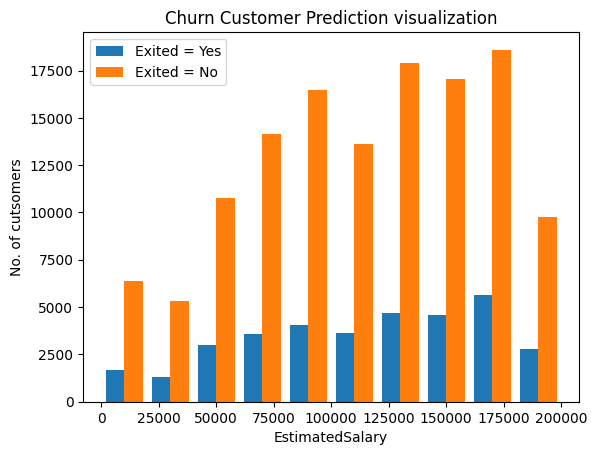

In [8]:
tenure_churn0 = df[df.Exited==0].EstimatedSalary
tenure_churn1 = df[df.Exited==1].EstimatedSalary

plt.hist([tenure_churn1,tenure_churn0],label=["Exited = Yes","Exited = No"])
plt.legend()
plt.ylabel("No. of cutsomers")
plt.xlabel("EstimatedSalary")
plt.title("Churn Customer Prediction visualization")

Text(0.5, 1.0, 'Churn Customer Prediction visualization')

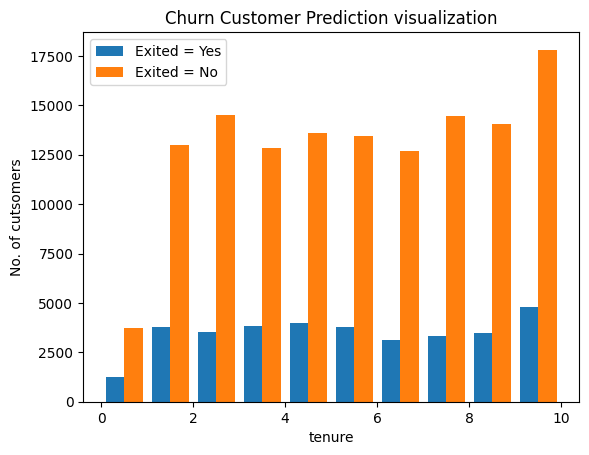

In [9]:
tenure_churn0 = df[df.Exited==0].Tenure
tenure_churn1 = df[df.Exited==1].Tenure

plt.hist([tenure_churn1,tenure_churn0],label=["Exited = Yes","Exited = No"])
plt.legend()
plt.ylabel("No. of cutsomers")
plt.xlabel("tenure")
plt.title("Churn Customer Prediction visualization")

In [10]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

Surname : ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Male' 'Female']


In [11]:
df.skew(numeric_only=True)

CreditScore       -0.059291
Age                0.968063
Tenure             0.006490
Balance            0.382020
NumOfProducts      0.368278
HasCrCard         -1.179255
IsActiveMember     0.008920
EstimatedSalary   -0.309022
Exited             1.412215
dtype: float64

In [12]:
df.corr(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

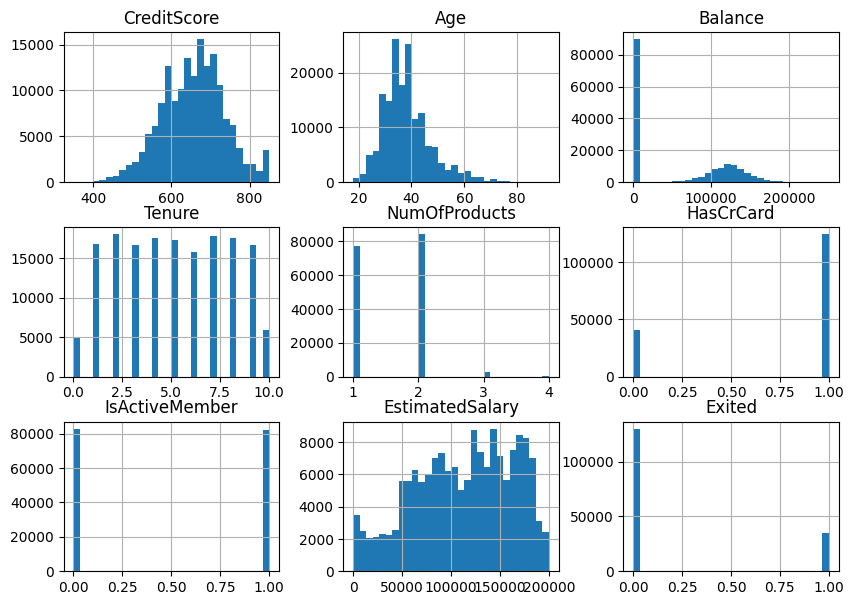

In [13]:
df[num].hist(bins=30,figsize = (10,7))

In [14]:
# fig,ax = plt.subplots(1,9,figsize=(14,4))
# df[df.Exited == 0][num].hist(bins=30,color = "blue",alpha = 0.5,ax=ax)
# df[df.Exited == 1][num].hist(bins=30,color = "red",alpha = 0.5,ax=ax)

In [15]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
df.shape

(165034, 12)

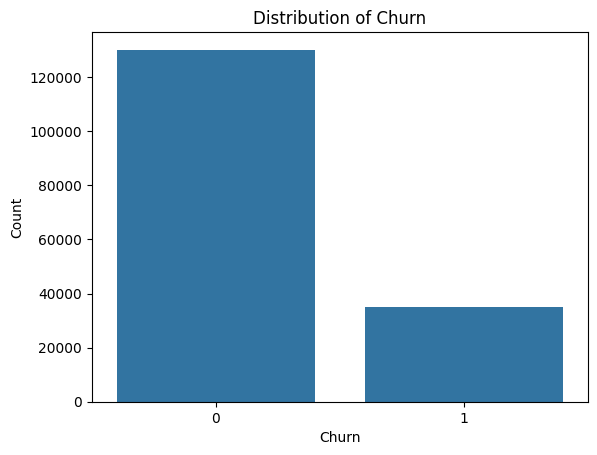

In [17]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          165034 non-null  object 
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 15.1+ MB


In [19]:
# df.duplicated().sum()

In [20]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [21]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [23]:
df.drop('Surname',axis=1,inplace = True)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [25]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True,dtype=int)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1


Scaling of values


In [27]:
y = df['Exited']
X = df.drop('Exited',axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [29]:
X_train.shape

(132027, 11)

In [30]:
# def getFeats(df): 
# #     df["Surname_First_Letter"] = df["Surname"].apply(lambda x: x[0]) 
#     df["Age_NumOfProducts"] = df["Age"] ** df["NumOfProducts"] 
#     df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0) 
#     df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember'] 
#     df['Products_Per_Tenure'] = df['Tenure'] / df['NumOfProducts'] 
#     df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category') 
#     df['AvgBalancePerProduct'] = df['Balance'] / df['NumOfProducts'] 
#     df['TenureToAgeRatio'] = df['Tenure'] / df['Age'] 
#     df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary'] 
#     df['CreditScoreTier'] = pd.cut(df['CreditScore'], bins=[0, 650, 750, 850], labels=['Low', 'Medium', 'High']) 
#     return df

# X_train1 = getFeats(X_train)
# X_test1 = getFeats(X_test)

# X_train1= pd.get_dummies(X_train1,columns =['CreditScoreTier'],drop_first=True,dtype=int)
# X_test1= pd.get_dummies(X_test1,columns =['CreditScoreTier'],drop_first=True,dtype=int)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
# X_train1.shape

In [38]:
X_train.shape

(132027, 11)

construct model

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization

In [41]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
# BatchNormalization()
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
  

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 8)                 96        
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [44]:
model.fit(X_train_scaled,y_train,epochs = 100,verbose =2)

Epoch 1/100
4126/4126 - 4s - loss: 0.3653 - accuracy: 0.8454 - 4s/epoch - 939us/step
Epoch 2/100
4126/4126 - 4s - loss: 0.3319 - accuracy: 0.8602 - 4s/epoch - 895us/step
Epoch 3/100
4126/4126 - 4s - loss: 0.3285 - accuracy: 0.8621 - 4s/epoch - 908us/step
Epoch 4/100
4126/4126 - 3s - loss: 0.3262 - accuracy: 0.8633 - 3s/epoch - 812us/step
Epoch 5/100
4126/4126 - 3s - loss: 0.3247 - accuracy: 0.8640 - 3s/epoch - 711us/step
Epoch 6/100
4126/4126 - 4s - loss: 0.3240 - accuracy: 0.8644 - 4s/epoch - 967us/step
Epoch 7/100
4126/4126 - 3s - loss: 0.3234 - accuracy: 0.8650 - 3s/epoch - 831us/step
Epoch 8/100
4126/4126 - 5s - loss: 0.3233 - accuracy: 0.8646 - 5s/epoch - 1ms/step
Epoch 9/100
4126/4126 - 5s - loss: 0.3230 - accuracy: 0.8650 - 5s/epoch - 1ms/step
Epoch 10/100
4126/4126 - 3s - loss: 0.3228 - accuracy: 0.8645 - 3s/epoch - 766us/step
Epoch 11/100
4126/4126 - 3s - loss: 0.3227 - accuracy: 0.8647 - 3s/epoch - 804us/step
Epoch 12/100
4126/4126 - 3s - loss: 0.3227 - accuracy: 0.8644 - 3s/

Epoch 97/100
4126/4126 - 3s - loss: 0.3207 - accuracy: 0.8653 - 3s/epoch - 702us/step
Epoch 98/100
4126/4126 - 3s - loss: 0.3208 - accuracy: 0.8656 - 3s/epoch - 784us/step
Epoch 99/100
4126/4126 - 3s - loss: 0.3206 - accuracy: 0.8654 - 3s/epoch - 748us/step
Epoch 100/100
4126/4126 - 4s - loss: 0.3207 - accuracy: 0.8656 - 4s/epoch - 856us/step


In [45]:
y_pred = model.predict(X_test_scaled)

1032/1032 [==============================] - 1s 699us/step


In [46]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr, tpr,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

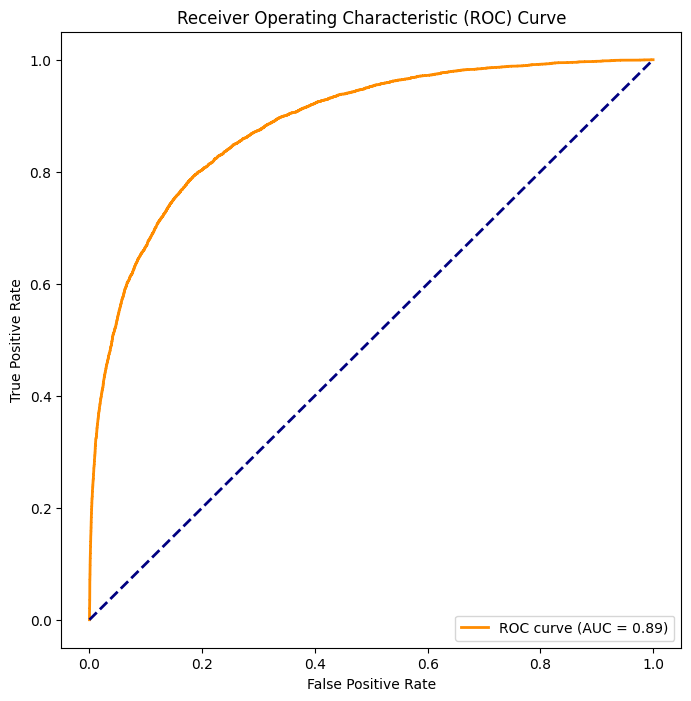

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
roc_auc

0.8854738231610029

In [49]:
df_test = pd.read_csv('test.csv')

In [50]:
# df_test_scaled = scaler.fit_transform(df_test)
df_test.drop(['id','CustomerId','Surname'],axis =1,inplace =True)

In [51]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [52]:
dff_test = pd.get_dummies(df_test,columns = ['Geography','Gender'],drop_first=True,dtype=int)

In [53]:
dff_test_scaled = scaler.fit_transform(dff_test)

In [54]:
answer = model.predict(dff_test_scaled)

3439/3439 [==============================] - 3s 809us/step


In [55]:
# ans = np.where(answer > 0.3106806,1,0)
rounded_array = np.around(answer, decimals=1)
rounded_array
# answer

array([[0. ],
       [0.8],
       [0. ],
       ...,
       [0. ],
       [0.1],
       [0.2]], dtype=float32)

In [56]:
sub = pd.read_csv('sample_submission.csv')

In [57]:
final_array = rounded_array.ravel()

In [58]:
final = pd.DataFrame({"id":sub["id"],
                    "Exited":final_array})

In [59]:
final.to_csv("submission.csv",index=False)

# USING MIN MAX

In [60]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

X_train_mx = mx.fit_transform(X_train)
X_test_mx = mx.fit_transform(X_test)

In [61]:
model1 = Sequential()
model1.add(Dense(11,activation = 'relu',input_dim = 11))
model1.add(Dense(5,activation = 'relu'))
model1.add(Dense(5,activation = 'relu'))
# model1.add(Dense(4,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [62]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 5)                 60        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model1.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [64]:
model1.fit(X_train_mx,y_train,epochs = 150,verbose =2)

Epoch 1/150
4126/4126 - 4s - loss: 0.4089 - accuracy: 0.8247 - 4s/epoch - 952us/step
Epoch 2/150
4126/4126 - 3s - loss: 0.3562 - accuracy: 0.8495 - 3s/epoch - 769us/step
Epoch 3/150
4126/4126 - 4s - loss: 0.3396 - accuracy: 0.8562 - 4s/epoch - 855us/step
Epoch 4/150
4126/4126 - 4s - loss: 0.3351 - accuracy: 0.8590 - 4s/epoch - 897us/step
Epoch 5/150
4126/4126 - 3s - loss: 0.3333 - accuracy: 0.8596 - 3s/epoch - 836us/step
Epoch 6/150
4126/4126 - 3s - loss: 0.3323 - accuracy: 0.8599 - 3s/epoch - 764us/step
Epoch 7/150
4126/4126 - 4s - loss: 0.3315 - accuracy: 0.8604 - 4s/epoch - 900us/step
Epoch 8/150
4126/4126 - 3s - loss: 0.3309 - accuracy: 0.8610 - 3s/epoch - 687us/step
Epoch 9/150
4126/4126 - 4s - loss: 0.3302 - accuracy: 0.8610 - 4s/epoch - 964us/step
Epoch 10/150
4126/4126 - 4s - loss: 0.3297 - accuracy: 0.8615 - 4s/epoch - 923us/step
Epoch 11/150
4126/4126 - 3s - loss: 0.3292 - accuracy: 0.8613 - 3s/epoch - 652us/step
Epoch 12/150
4126/4126 - 3s - loss: 0.3289 - accuracy: 0.8618 -

Epoch 97/150
4126/4126 - 3s - loss: 0.3224 - accuracy: 0.8650 - 3s/epoch - 695us/step
Epoch 98/150
4126/4126 - 3s - loss: 0.3223 - accuracy: 0.8650 - 3s/epoch - 755us/step
Epoch 99/150
4126/4126 - 3s - loss: 0.3224 - accuracy: 0.8648 - 3s/epoch - 695us/step
Epoch 100/150
4126/4126 - 3s - loss: 0.3222 - accuracy: 0.8651 - 3s/epoch - 714us/step
Epoch 101/150
4126/4126 - 3s - loss: 0.3223 - accuracy: 0.8651 - 3s/epoch - 719us/step
Epoch 102/150
4126/4126 - 3s - loss: 0.3223 - accuracy: 0.8646 - 3s/epoch - 802us/step
Epoch 103/150
4126/4126 - 3s - loss: 0.3223 - accuracy: 0.8650 - 3s/epoch - 640us/step
Epoch 104/150
4126/4126 - 3s - loss: 0.3223 - accuracy: 0.8644 - 3s/epoch - 733us/step
Epoch 105/150
4126/4126 - 3s - loss: 0.3222 - accuracy: 0.8652 - 3s/epoch - 738us/step
Epoch 106/150
4126/4126 - 4s - loss: 0.3224 - accuracy: 0.8654 - 4s/epoch - 881us/step
Epoch 107/150
4126/4126 - 3s - loss: 0.3221 - accuracy: 0.8652 - 3s/epoch - 750us/step
Epoch 108/150
4126/4126 - 3s - loss: 0.3223 - 

In [65]:
y_pred1 = model1.predict(X_test_mx)

1032/1032 [==============================] - 1s 711us/step


In [66]:
fpr1, tpr1,thresholds1 = roc_curve(y_test,y_pred1)
roc_auc1 = auc(fpr1,tpr1)

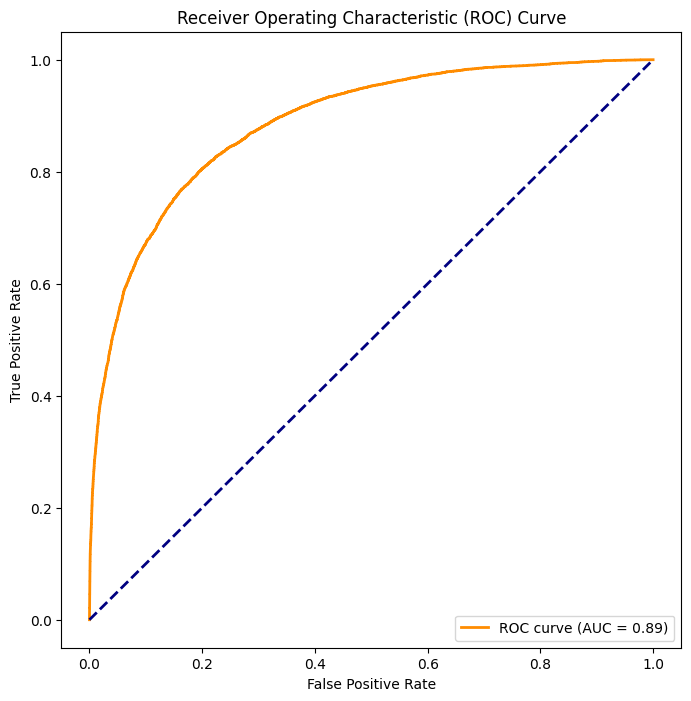

In [67]:
plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
roc_auc1

0.8860187228982557

In [69]:
dff_test_mx =mx.fit_transform(dff_test)

In [70]:
answer1 = model1.predict(dff_test_mx)

3439/3439 [==============================] - 4s 1ms/step


In [71]:
rounded_array1 = np.around(answer1, decimals=1)
rounded_array1

array([[0. ],
       [0.9],
       [0. ],
       ...,
       [0. ],
       [0.2],
       [0.2]], dtype=float32)

In [72]:
final_array1 = rounded_array1.ravel()
final1 = pd.DataFrame({"id":sub["id"],
                    "Exited":final_array1})

In [73]:
final1.to_csv("submission1.csv",index=False)